In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from keras.preprocessing import image
from tensorflow.keras.layers.experimental import preprocessing
import keras

In [3]:
train_df = pd.read_csv(r'C:\Users\mbk02\Documents\Retina\Training_Set\Training_Set\RFMiD_Training_Labels.csv')
test_df = pd.read_csv(r'C:\Users\mbk02\Documents\Retina\Test_Set\Test_Set\RFMiD_Testing_Labels.csv')
val_df = pd.read_csv(r'C:\Users\mbk02\Documents\Retina\Evaluation_Set\Evaluation_Set\RFMiD_Validation_Labels.csv')

In [4]:
train_df['img_path'] = [f'C:/Users/mbk02/Documents/Retina/Training_Set/Training_Set/Training/{id}.png' for id in train_df['ID']]
val_df['img_path'] = [f'C:/Users/mbk02/Documents/Retina/Evaluation_Set/Evaluation_Set/Validation/{id}.png' for id in val_df['ID']]
test_df['img_path'] = [f'C:/Users/mbk02/Documents/Retina/Test_Set/Test_Set/Test/{id}.png' for id in test_df['ID']]        

In [5]:
train_df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL,img_path
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...


In [6]:
cols=['Disease_Risk','img_path']

In [7]:
train_df=train_df[cols]
val_df=val_df[cols]
test_df=test_df[cols]

In [8]:
train_df

,Disease_Risk,img_path
0,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
2,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
3,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
4,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
...,...,...
1915,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1916,1,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1917,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...
1918,0,C:/Users/mbk02/Documents/Retina/Training_Set/T...


In [9]:
Y_train = list(train_df.drop(['img_path'], axis=1).columns)
Y_val = list(val_df.drop(['img_path'], axis=1).columns)
Y_test = list(test_df.drop(['img_path'], axis=1).columns)

In [10]:
Y_train

['Disease_Risk']

In [11]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_dataframe(train_df, 
                                              x_col='img_path', 
                                              y_col=Y_train,
                                              rescale=1./255,
                                              rotation_range=40,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,
                                              fill_mode='nearest',
                                              target_size=(224, 224),
                                              class_mode='raw',
                                              batch_size=32,
                                              shuffle=True)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_dataframe(val_df,
                                          x_col='img_path',
                                          y_col=Y_val,
                                          rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest',
                                          target_size=(224, 224),
                                          class_mode='raw',
                                          batch_size=32)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_dataframe(test_df,
                                            x_col='img_path',
                                            y_col=Y_test,
                                            rescale=1./255,
                                            rotation_range=40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode='nearest',
                                            target_size=(224, 224),
                                            class_mode='raw')

Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


# VGG16

In [81]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation= 'relu')(x)
x = Dense(1, activation='sigmoid')(x) 


model = Model(inputs=base_model.input, outputs=x)


for layer in base_model.layers:
    layer.trainable = False
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[additional_metrics])


model.summary()


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [82]:
model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)


Epoch 1/10
60/60 [==============================] - 349s 6s/step - loss: 0.4839 - accuracy: 0.8135 - auc: 0.8217 - precision: 0.8672 - recall: 0.9026 - val_loss: 0.2909 - val_accuracy: 0.8547 - val_auc: 0.9198 - val_precision: 0.9010 - val_recall: 0.9170
Epoch 2/10
60/60 [==============================] - 313s 5s/step - loss: 0.3236 - accuracy: 0.8448 - auc: 0.8943 - precision: 0.8837 - recall: 0.9256 - val_loss: 0.3196 - val_accuracy: 0.8469 - val_auc: 0.9115 - val_precision: 0.8835 - val_recall: 0.9289
Epoch 3/10
60/60 [==============================] - 319s 5s/step - loss: 0.2711 - accuracy: 0.8708 - auc: 0.9283 - precision: 0.9061 - recall: 0.9335 - val_loss: 0.3095 - val_accuracy: 0.8406 - val_auc: 0.9107 - val_precision: 0.8840 - val_recall: 0.9190
Epoch 4/10
60/60 [==============================] - 317s 5s/step - loss: 0.2586 - accuracy: 0.8766 - auc: 0.9337 - precision: 0.9104 - recall: 0.9361 - val_loss: 0.3189 - val_accuracy: 0.8484 - val_auc: 0.9156 - val_precision: 0.9234 -

In [15]:
model.save('C:/Users/mbk02/Documents/Retina/Detection Models/VGG16.h5')

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/VGG16.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall= evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 163s 8s/step - loss: 0.2859 - accuracy: 0.8766 - auc: 0.9494 - precision: 0.9533 - recall: 0.8874
Accuracy: 0.8765624761581421
AUC: 0.9494203925132751
Precision: 0.9532908797264099
Recall: 0.8873517513275146
F1-Score: 0.9191402148122851


# EfficientNetV2-M

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

model = tf.keras.applications.EfficientNetV2M(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

for layer in model.layers:
    layer.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dense(256, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

custom_model = tf.keras.Model(inputs=model.input, outputs=output)

additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                            

In [19]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 291s 5s/step - loss: 0.3847 - accuracy: 0.8349 - auc: 0.8314 - precision: 0.8642 - recall: 0.9388 - val_loss: 0.2940 - val_accuracy: 0.8734 - val_auc: 0.9204 - val_precision: 0.9159 - val_recall: 0.9249
Epoch 2/10
60/60 [==============================] - 274s 5s/step - loss: 0.3312 - accuracy: 0.8411 - auc: 0.8860 - precision: 0.8706 - recall: 0.9388 - val_loss: 0.2935 - val_accuracy: 0.8562 - val_auc: 0.9190 - val_precision: 0.8848 - val_recall: 0.9407
Epoch 3/10
60/60 [==============================] - 276s 5s/step - loss: 0.2949 - accuracy: 0.8635 - auc: 0.9126 - precision: 0.8940 - recall: 0.9388 - val_loss: 0.2917 - val_accuracy: 0.8625 - val_auc: 0.9222 - val_precision: 0.9035 - val_recall: 0.9249
Epoch 4/10
60/60 [==============================] - 275s 5s/step - loss: 0.2908 - accuracy: 0.8740 - auc: 0.9151 - precision: 0.8973 - recall: 0.9493 - val_loss: 0.3059 - val_accuracy: 0.8719 - val_auc: 0.9166 - val_precision: 0.9257 -

In [20]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Efficientnetv2m.h5')

In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Efficientnetv2m.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 87s 4s/step - loss: 0.2839 - accuracy: 0.8813 - auc: 0.9492 - precision: 0.9654 - recall: 0.8814
Accuracy: 0.8812500238418579
AUC: 0.949213981628418
Precision: 0.9653679728507996
Recall: 0.8814229369163513
F1-Score: 0.9214876132809426


# ResNet-50

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_layer)

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

custom_model = Model(inputs=input_layer, outputs=output)

additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [15]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 275s 5s/step - loss: 0.4310 - accuracy: 0.8214 - auc: 0.8245 - precision: 0.8693 - recall: 0.9111 - val_loss: 0.2849 - val_accuracy: 0.8750 - val_auc: 0.9264 - val_precision: 0.9329 - val_recall: 0.9071
Epoch 2/10
60/60 [==============================] - 308s 5s/step - loss: 0.3027 - accuracy: 0.8547 - auc: 0.9050 - precision: 0.8899 - recall: 0.9315 - val_loss: 0.2741 - val_accuracy: 0.8672 - val_auc: 0.9301 - val_precision: 0.9253 - val_recall: 0.9051
Epoch 3/10
60/60 [==============================] - 253s 4s/step - loss: 0.2940 - accuracy: 0.8672 - auc: 0.9119 - precision: 0.8990 - recall: 0.9375 - val_loss: 0.2736 - val_accuracy: 0.8656 - val_auc: 0.9290 - val_precision: 0.8977 - val_recall: 0.9368
Epoch 4/10
60/60 [==============================] - 245s 4s/step - loss: 0.2633 - accuracy: 0.8849 - auc: 0.9305 - precision: 0.9102 - recall: 0.9480 - val_loss: 0.2937 - val_accuracy: 0.8406 - val_auc: 0.9177 - val_precision: 0.8870 -

In [16]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet50.h5')

In [63]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet50.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 65s 3s/step - loss: 0.2583 - accuracy: 0.9047 - auc: 0.9548 - precision: 0.9626 - recall: 0.9150
Accuracy: 0.9046875238418579
AUC: 0.9547592997550964
Precision: 0.9625779390335083
Recall: 0.9150197505950928
F1-Score: 0.9381965375948047


# InceptionResNet-V2

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=input_layer)

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

custom_model = Model(inputs=input_layer, outputs=output)

additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [19]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 256s 4s/step - loss: 44.5315 - accuracy: 0.6745 - auc: 0.5006 - precision: 0.7910 - recall: 0.7999 - val_loss: 2.5894 - val_accuracy: 0.7906 - val_auc: 0.4921 - val_precision: 0.7906 - val_recall: 1.0000
Epoch 2/10
60/60 [==============================] - 254s 4s/step - loss: 11.7708 - accuracy: 0.6922 - auc: 0.5101 - precision: 0.7944 - recall: 0.8242 - val_loss: 3.2464 - val_accuracy: 0.7906 - val_auc: 0.4960 - val_precision: 0.7906 - val_recall: 1.0000
Epoch 3/10
60/60 [==============================] - 250s 4s/step - loss: 3.8392 - accuracy: 0.6995 - auc: 0.5365 - precision: 0.8008 - recall: 0.8255 - val_loss: 1.4213 - val_accuracy: 0.4734 - val_auc: 0.6104 - val_precision: 0.8536 - val_recall: 0.4032
Epoch 4/10
60/60 [==============================] - 243s 4s/step - loss: 5.6035 - accuracy: 0.6724 - auc: 0.4941 - precision: 0.7901 - recall: 0.7979 - val_loss: 1.6950 - val_accuracy: 0.7875 - val_auc: 0.5763 - val_precision: 0.7900

In [20]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Inceptionresnetv2.h5')

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Inceptionresnetv2.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 70s 3s/step - loss: 0.8631 - accuracy: 0.7891 - auc: 0.8060 - precision: 0.7949 - recall: 0.9881
Accuracy: 0.7890625
AUC: 0.8060144186019897
Precision: 0.794912576675415
Recall: 0.9881423115730286
F1-Score: 0.8810572867850722


# ResNet-152

In [28]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

custom_model= Model(inputs=base_model.input, outputs=output)

additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [29]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 352s 6s/step - loss: 0.4409 - accuracy: 0.8203 - auc: 0.8201 - precision: 0.8683 - recall: 0.9111 - val_loss: 0.2809 - val_accuracy: 0.8719 - val_auc: 0.9279 - val_precision: 0.9344 - val_recall: 0.9012
Epoch 2/10
60/60 [==============================] - 323s 5s/step - loss: 0.3037 - accuracy: 0.8583 - auc: 0.9062 - precision: 0.8885 - recall: 0.9388 - val_loss: 0.2765 - val_accuracy: 0.8719 - val_auc: 0.9370 - val_precision: 0.8799 - val_recall: 0.9704
Epoch 3/10
60/60 [==============================] - 319s 5s/step - loss: 0.2706 - accuracy: 0.8786 - auc: 0.9263 - precision: 0.9039 - recall: 0.9473 - val_loss: 0.2821 - val_accuracy: 0.8609 - val_auc: 0.9305 - val_precision: 0.8798 - val_recall: 0.9545
Epoch 4/10
60/60 [==============================] - 317s 5s/step - loss: 0.2529 - accuracy: 0.8797 - auc: 0.9356 - precision: 0.9071 - recall: 0.9447 - val_loss: 0.2856 - val_accuracy: 0.8531 - val_auc: 0.9231 - val_precision: 0.8931 -

In [30]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet152.h5')

In [65]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet152.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 87s 4s/step - loss: 0.3018 - accuracy: 0.8797 - auc: 0.9566 - precision: 0.9756 - recall: 0.8696
Accuracy: 0.879687488079071
AUC: 0.9565955400466919
Precision: 0.9756097793579102
Recall: 0.8695651888847351
F1-Score: 0.9195402242781725


# InceptionV3

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.metrics import AUC, Precision, Recall

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

inceptionv3 = Model(inputs=base_model.input, outputs=output)
additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

inceptionv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[additional_metrics])

inceptionv3.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

In [33]:
inceptionv3.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 214s 4s/step - loss: 5.6975 - accuracy: 0.7151 - auc: 0.5704 - precision: 0.8152 - recall: 0.8275 - val_loss: 1.1663 - val_accuracy: 0.4406 - val_auc: 0.5897 - val_precision: 0.8190 - val_recall: 0.3755
Epoch 2/10
60/60 [==============================] - 207s 3s/step - loss: 1.1509 - accuracy: 0.7250 - auc: 0.6334 - precision: 0.8241 - recall: 0.8295 - val_loss: 0.7608 - val_accuracy: 0.6187 - val_auc: 0.7084 - val_precision: 0.8830 - val_recall: 0.5968
Epoch 3/10
60/60 [==============================] - 205s 3s/step - loss: 0.5833 - accuracy: 0.7844 - auc: 0.7360 - precision: 0.8521 - recall: 0.8802 - val_loss: 0.8999 - val_accuracy: 0.7937 - val_auc: 0.7236 - val_precision: 0.7959 - val_recall: 0.9941
Epoch 4/10
60/60 [==============================] - 204s 3s/step - loss: 0.6444 - accuracy: 0.7839 - auc: 0.7305 - precision: 0.8480 - recall: 0.8855 - val_loss: 0.5074 - val_accuracy: 0.8188 - val_auc: 0.7450 - val_precision: 0.8305 -

In [34]:
inceptionv3.save('C:/Users/mbk02/Documents/Retina/Detection Models/Inceptionv3.h5')

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Inceptionv3.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 57s 3s/step - loss: 0.6677 - accuracy: 0.8094 - auc: 0.7921 - precision: 0.8057 - recall: 1.0000
Accuracy: 0.809374988079071
AUC: 0.7921066284179688
Precision: 0.8057324886322021
Recall: 1.0
F1-Score: 0.8924162285439352


# Densenet-121

In [36]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

custom_model = Model(inputs=base_model.input, outputs=output)


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_9[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [37]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 249s 4s/step - loss: 0.9054 - accuracy: 0.7542 - auc: 0.6293 - precision: 0.8214 - recall: 0.8808 - val_loss: 0.4530 - val_accuracy: 0.7875 - val_auc: 0.7870 - val_precision: 0.8599 - val_recall: 0.8735
Epoch 2/10
60/60 [==============================] - 227s 4s/step - loss: 0.4434 - accuracy: 0.8214 - auc: 0.7721 - precision: 0.8467 - recall: 0.9454 - val_loss: 0.3985 - val_accuracy: 0.8234 - val_auc: 0.8236 - val_precision: 0.8478 - val_recall: 0.9466
Epoch 3/10
60/60 [==============================] - 230s 4s/step - loss: 0.4662 - accuracy: 0.8078 - auc: 0.7678 - precision: 0.8502 - recall: 0.9190 - val_loss: 0.3805 - val_accuracy: 0.8313 - val_auc: 0.8384 - val_precision: 0.8455 - val_recall: 0.9625
Epoch 4/10
60/60 [==============================] - 230s 4s/step - loss: 0.4046 - accuracy: 0.8219 - auc: 0.8127 - precision: 0.8530 - recall: 0.9361 - val_loss: 0.4218 - val_accuracy: 0.8125 - val_auc: 0.8617 - val_precision: 0.9177 -

In [38]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Densenet121.h5')

In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Densenet121.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 66s 3s/step - loss: 0.3105 - accuracy: 0.8875 - auc: 0.8889 - precision: 0.9110 - recall: 0.9506
Accuracy: 0.887499988079071
AUC: 0.8888635039329529
Precision: 0.9109848737716675
Recall: 0.9505928754806519
F1-Score: 0.9303675132836079


# Xception

In [45]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

custom_model = Model(inputs=base_model.input, outputs=output)


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [52]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 370s 6s/step - loss: 0.4160 - accuracy: 0.7911 - auc: 0.5000 - precision: 0.7911 - recall: 1.0000 - val_loss: 1758.9309 - val_accuracy: 0.7906 - val_auc: 0.5000 - val_precision: 0.7906 - val_recall: 1.0000
Epoch 2/10
60/60 [==============================] - 366s 6s/step - loss: 0.3911 - accuracy: 0.7911 - auc: 0.5000 - precision: 0.7911 - recall: 1.0000 - val_loss: 17.0001 - val_accuracy: 0.7906 - val_auc: 0.5000 - val_precision: 0.7906 - val_recall: 1.0000
Epoch 3/10
60/60 [==============================] - 368s 6s/step - loss: 0.3519 - accuracy: 0.7911 - auc: 0.5000 - precision: 0.7911 - recall: 1.0000 - val_loss: 0.4529 - val_accuracy: 0.7906 - val_auc: 0.5000 - val_precision: 0.7906 - val_recall: 1.0000
Epoch 4/10
60/60 [==============================] - 367s 6s/step - loss: 0.3259 - accuracy: 0.7911 - auc: 0.5000 - precision: 0.7911 - recall: 1.0000 - val_loss: 2.9997 - val_accuracy: 0.7906 - val_auc: 0.5000 - val_precision: 0.79

In [47]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Xception.h5')

In [61]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Xception.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 64s 3s/step - loss: 0.3428 - accuracy: 0.7906 - auc: 0.5000 - precision: 0.7906 - recall: 1.0000
Accuracy: 0.7906249761581421
AUC: 0.5
Precision: 0.7906249761581421
Recall: 1.0
F1-Score: 0.8830715383569147


# ResNetV2-50

In [53]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_shape = (224, 224, 3)

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=input_shape)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
custom_model = Model(inputs=base_model.input, outputs=output)


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [54]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 374s 6s/step - loss: 0.4655 - accuracy: 0.8073 - auc: 0.7441 - precision: 0.8311 - recall: 0.9493 - val_loss: 1.2325 - val_accuracy: 0.7906 - val_auc: 0.6170 - val_precision: 0.7906 - val_recall: 1.0000
Epoch 2/10
60/60 [==============================] - 369s 6s/step - loss: 0.3690 - accuracy: 0.8391 - auc: 0.8516 - precision: 0.8610 - recall: 0.9500 - val_loss: 2.5891 - val_accuracy: 0.7937 - val_auc: 0.5164 - val_precision: 0.7931 - val_recall: 1.0000
Epoch 3/10
60/60 [==============================] - 368s 6s/step - loss: 0.3417 - accuracy: 0.8453 - auc: 0.8764 - precision: 0.8790 - recall: 0.9329 - val_loss: 0.6800 - val_accuracy: 0.8125 - val_auc: 0.7620 - val_precision: 0.8174 - val_recall: 0.9822
Epoch 4/10
60/60 [==============================] - 368s 6s/step - loss: 0.3050 - accuracy: 0.8620 - auc: 0.9054 - precision: 0.8943 - recall: 0.9361 - val_loss: 0.4923 - val_accuracy: 0.8000 - val_auc: 0.8762 - val_precision: 0.8010 -

In [55]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet50v2.h5')

In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet50v2.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 68s 3s/step - loss: 0.4214 - accuracy: 0.8531 - auc: 0.9047 - precision: 0.9459 - recall: 0.8636
Accuracy: 0.8531249761581421
AUC: 0.9047032594680786
Precision: 0.9458874464035034
Recall: 0.8636363744735718
F1-Score: 0.9028925681409756


# ResNetV2-152

In [57]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_shape = (224, 224, 3)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=input_shape)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
custom_model = Model(inputs=base_model.input, outputs=output)


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

custom_model.summary()


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [58]:
custom_model.fit(train_gen, epochs=10, validation_data=val_gen, batch_size=32)

Epoch 1/10
60/60 [==============================] - 926s 15s/step - loss: 0.4652 - accuracy: 0.8083 - auc: 0.7563 - precision: 0.8336 - recall: 0.9467 - val_loss: 17.9212 - val_accuracy: 0.7922 - val_auc: 0.5112 - val_precision: 0.7919 - val_recall: 1.0000
Epoch 2/10
60/60 [==============================] - 955s 16s/step - loss: 0.3909 - accuracy: 0.8339 - auc: 0.8256 - precision: 0.8538 - recall: 0.9533 - val_loss: 0.4138 - val_accuracy: 0.8391 - val_auc: 0.8067 - val_precision: 0.8492 - val_recall: 0.9684
Epoch 3/10
60/60 [==============================] - 940s 16s/step - loss: 0.3817 - accuracy: 0.8380 - auc: 0.8354 - precision: 0.8532 - recall: 0.9605 - val_loss: 3.1010 - val_accuracy: 0.4719 - val_auc: 0.3227 - val_precision: 0.7320 - val_recall: 0.5237
Epoch 4/10
60/60 [==============================] - 790s 13s/step - loss: 0.3948 - accuracy: 0.8245 - auc: 0.8208 - precision: 0.8444 - recall: 0.9539 - val_loss: 0.7317 - val_accuracy: 0.8219 - val_auc: 0.8172 - val_precision: 0.8

In [59]:
custom_model.save('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet152v2.h5')

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import load_model

model = load_model('C:/Users/mbk02/Documents/Retina/Detection Models/Resnet152v2.h5')


additional_metrics = ['accuracy', tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=additional_metrics)

evaluation = model.evaluate(test_gen, verbose=1)

loss, accuracy, auc, precision, recall = evaluation

f1 = 2*(precision*recall)/(precision+recall)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

20/20 [==============================] - 83s 4s/step - loss: 0.5250 - accuracy: 0.7969 - auc: 0.8916 - precision: 0.9563 - recall: 0.7787
Accuracy: 0.796875
AUC: 0.8916435837745667
Precision: 0.9563106894493103
Recall: 0.7786561250686646
F1-Score: 0.8583878026684046


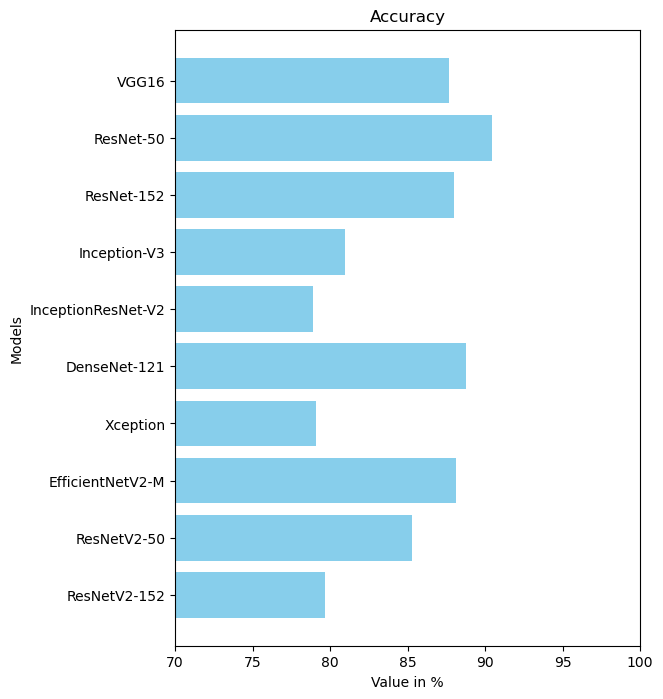

In [83]:
Models = ['ResNetV2-152', 'ResNetV2-50','EfficientNetV2-M', 'Xception', 'DenseNet-121', 'InceptionResNet-V2', 'Inception-V3', 'ResNet-152', 'ResNet-50', 'VGG16']
values = [79.68,85.31,88.12,79.06,88.74,78.9,80.93,87.96,90.46,87.65]
plt.figure(figsize=(6, 8))
plt.barh(Models, values, color='skyblue')
plt.xlim(70, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Accuracy')
plt.show()

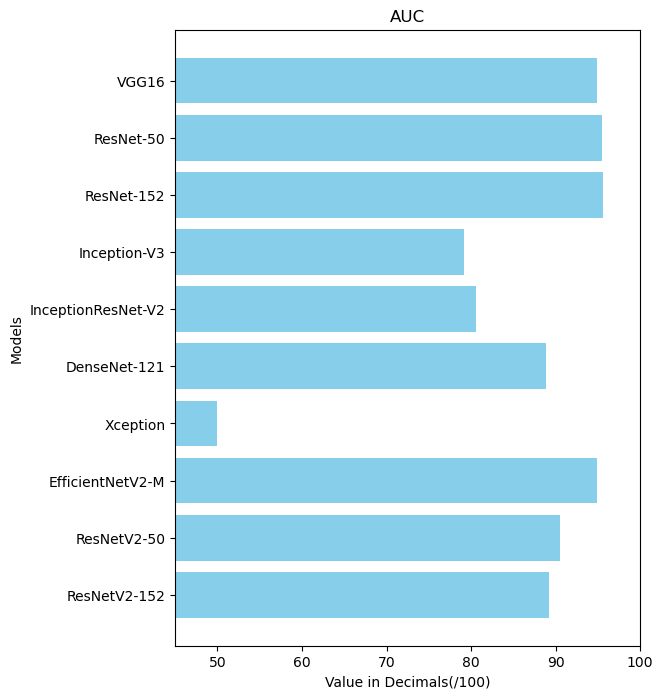

In [84]:
values = [89.16,90.47,94.92,50,88.88,80.6,79.21,95.65,95.47,94.94]

plt.figure(figsize=(6, 8))
plt.barh(Models, values, color='skyblue')
plt.xlim(45, 100)
plt.ylabel('Models')
plt.xlabel('Value in Decimals(/100)')
plt.title('AUC')
plt.show()

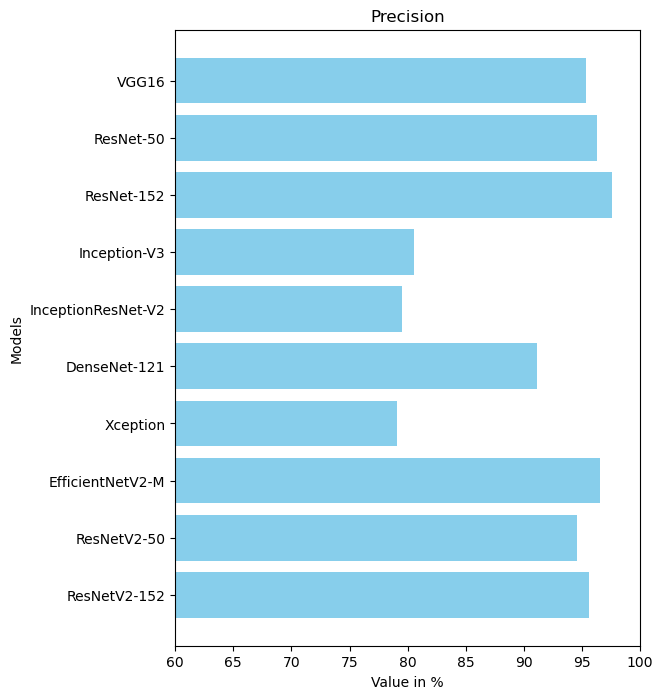

In [85]:
values = [95.63,94.58,96.53,79.06,91.09,79.49,80.57,97.56,96.25,95.32]

plt.figure(figsize=(6, 8))
plt.barh(Models, values, color='skyblue')
plt.xlim(60, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Precision')
plt.show()

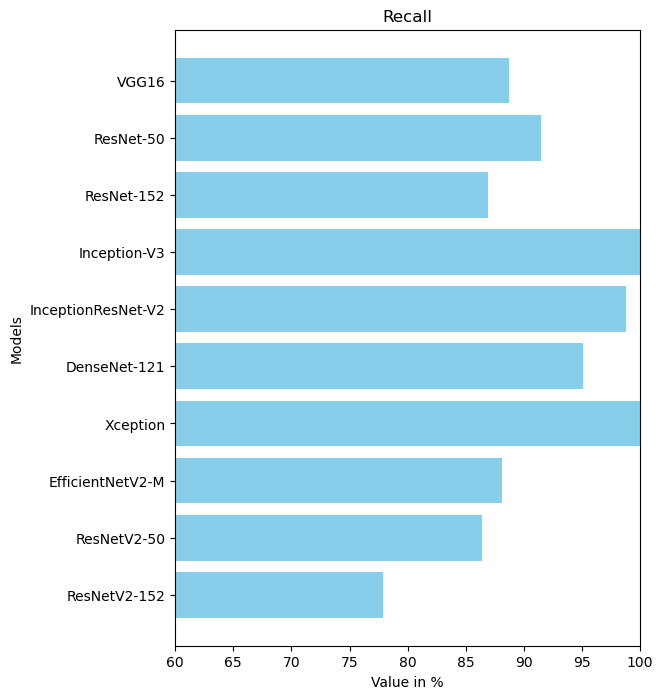

In [86]:
values = [77.89,86.36,88.14,100,95.05,98.81,100,86.95,91.5,88.73]

plt.figure(figsize=(6, 8))
plt.barh(Models, values, color='skyblue')
plt.xlim(60, 100)
plt.ylabel('Models')
plt.xlabel('Value in %')
plt.title('Recall')
plt.show()

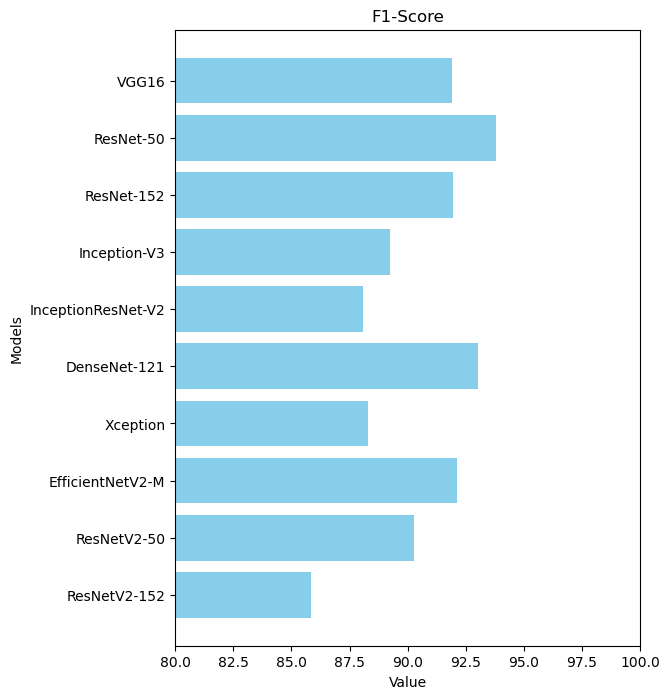

In [87]:
values = [85.83,90.28,92.14,88.3,93.03,88.1,89.24,91.95,93.81,91.91]

plt.figure(figsize=(6, 8))
plt.barh(Models, values, color='skyblue')
plt.xlim(80, 100)
plt.ylabel('Models')
plt.xlabel('Value')
plt.title('F1-Score')
plt.show()